# Stock Linear Regression

In [1]:
# Library
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import math

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
stock_name = 'AMD'
start = '2010-01-01' 
end = '2018-09-27'
df = yf.download(stock_name, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [3]:
X = df.index.values
y = df['Adj Close'].values

In [4]:
X.shape

(2200,)

In [5]:
X = X.reshape((2200,-1))

In [6]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
df.data = df[['Open','High','Low','Volume']]
df.target = df['Adj Close']

In [8]:
## Degrees of freedom on dependent variable variance
df_v = X.shape[0] - 1
print('Degrees of freedom on variable:', df_v)
## Degrees of freedom of error variance
df_e = X.shape[0] - X.shape[1] - 1
print('Degrees of freedom of error:', df_e)

Degrees of freedom on variable: 2199
Degrees of freedom of error: 2198


Sum of Squared Errors (SSE) is a measurement of model's predictions from the actual values

In [9]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
squared_errors = (y - model.predict(X)) ** 2
sse = np.sum(squared_errors)
print('Sum of Squared Errors (SSE):', round(sse,4))

Sum of Squared Errors (SSE): 39802.0693


Total Sum of Squares (SST) is a measurement of the variance in the target variable.

In [10]:
avg_y = np.mean(y)
squared_errors = (y - avg_y) ** 2
sst = np.sum(squared_errors)
print('Total Sum of Squares (SST):', round(sst,4))

Total Sum of Squares (SST): 45736.2484


R^2 is the measurement of the variances in dependent variable that is predictable from the indepdented variable. 

Is a goodness-of-fit measure for linear regression models. It measures the strength of the relationship between the model and the dependent variable. The scale between 0 to 100%. 

In [11]:
r_squared = 1 - (sse/sst)
print('R^2:', round(r_squared,4))

R^2: 0.1297


Adjusted R^2 is the measurement that increases if the new term improves the model more than would be expected by chance.

In [12]:
adj_r = 1 - (sse/df_e) / (sst/df_v)
print('Adjusted R^2:', round(adj_r,4))

Adjusted R^2: 0.1294


In [13]:
print('             Summary Key Metric              ')
print('__________________________________________')
print('Sum of Squared Errors (SSE): ', round(sse,4))
print('Total Sum of Squares (SST):  ', round(sst,4))
print('R^2:                         ', round(r_squared,4))
print('Adjusted R^2:                ', round(adj_r,4))

             Summary Key Metric              
__________________________________________
Sum of Squared Errors (SSE):  39802.0693
Total Sum of Squares (SST):   45736.2484
R^2:                          0.1297
Adjusted R^2:                 0.1294


In [14]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [15]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [16]:
stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     39802.0693
sst:     45736.2484
r^2:     0.1297
adj_r^2: 0.1294


In [17]:
stock_name = 'AMD'
start = '2010-01-01' 
end = '2018-09-27'
df = yf.download(stock_name, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 downloaded


In [18]:
X = df.index.values
y = df['Adj Close'].values

In [19]:
x_reshape = X.reshape((2200,-1))

In [20]:
# Linear Model
linear = LinearRegression()
linear.fit(x_reshape, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
# Non Linear Model
y_nonlinear = [x**3 + np.random.rand(1)*10 for x in range(2200)]
nonlinear = LinearRegression()
nonlinear.fit(x_reshape, y_nonlinear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5,0,'predicted values')

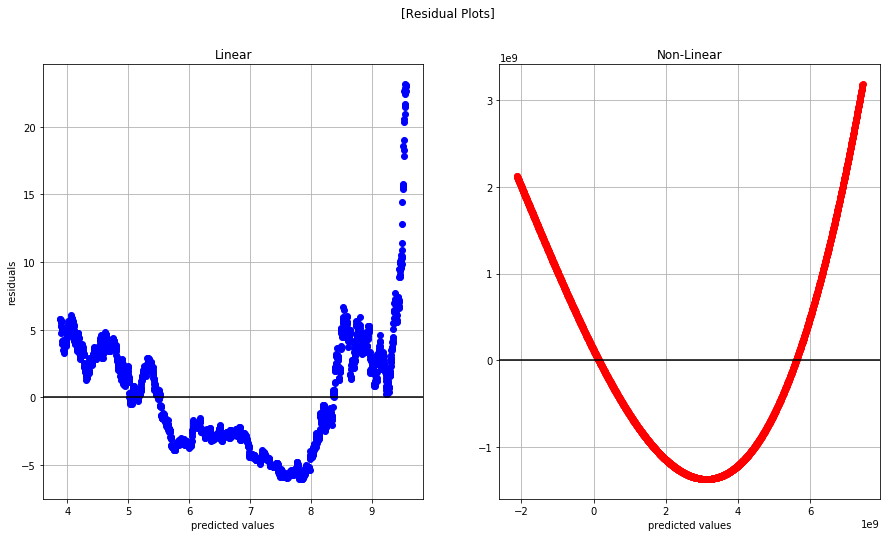

In [22]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False)
fig.suptitle('[Residual Plots]')
fig.set_size_inches(15,8)
axes[0].plot(linear.predict(x_reshape), y-linear.predict(x_reshape), 'bo')
axes[0].axhline(y=0, color='k')
axes[0].grid()
axes[0].set_title('Linear')
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('residuals')
axes[1].plot(nonlinear.predict(x_reshape), y_nonlinear-nonlinear.predict(x_reshape), 'ro')
axes[1].axhline(y=0, color='k')
axes[1].grid()
axes[1].set_title('Non-Linear')
axes[1].set_xlabel('predicted values')

In [23]:
s1 = Stats(x_reshape, y_nonlinear, nonlinear)
pretty_print_stats(s1)

sse:     3204194240724972077056.0000
sst:     20015608785841416044544.0000
r^2:     0.8399
adj_r^2: 0.8398


In [24]:
s1 = Stats(x_reshape, y, linear)
pretty_print_stats(s1)

sse:     39802.0693
sst:     45736.2484
r^2:     0.1297
adj_r^2: 0.1294


Text(0.5,1,'Linear')

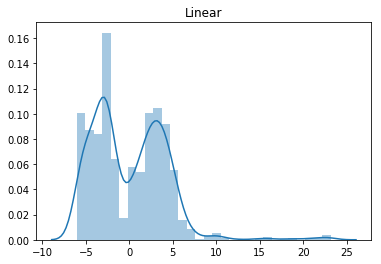

In [25]:
residuals_linear = y - linear.predict(x_reshape)
residuals_nlinear = y_nonlinear - nonlinear.predict(x_reshape)

sns.distplot(residuals_linear);
plt.title('Linear')

Text(0.5,1,'Non-Linear')

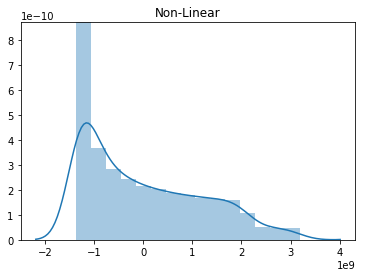

In [26]:
sns.distplot(residuals_nlinear)
plt.title('Non-Linear')

In [27]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=556.59256449981638, pvalue=1.3723354580523852e-121)

In [28]:
normaltest(residuals_nlinear)

NormaltestResult(statistic=array([ 235.33885248]), pvalue=array([  7.88528682e-52]))